In [8]:
import scipy.optimize
import numpy as np
import pandas as pd

import os
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
figsize(12, 10)
sbn.set_context("paper", font_scale=1)
sbn.set_style("whitegrid")

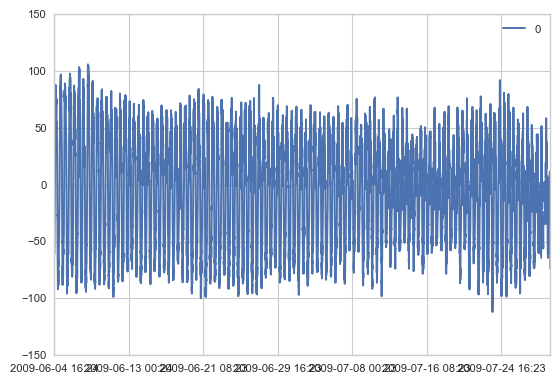

In [24]:
station_data = os.path.join('currentData', 'COD0901.pkl')

currents = pd.read_pickle(station_data)
currents.dropna()

currents['COD0901.1.s'] = pd.to_numeric(currents['COD0901.1.s'])
currents['COD0901.1.d'] = pd.to_numeric(currents['COD0901.1.d'])
speedAndDirection = pd.DataFrame(currents['COD0901.1.s'].values*np.cos(currents['COD0901.1.d'].values*np.pi/180.), 
             index=currents.index)

plt.figure()
speedAndDirection.plot()

In [2]:
velocities = np.array([0,.5,1,1.5,2,2.5,3,3.5,4,10])
power = np.array([0,20,75,300,800, 1100, 1175, 1195, 1200,1200])

/Users/Cain/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/Users/Cain/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


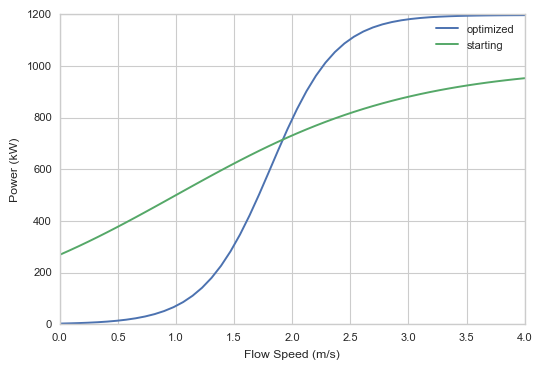

In [5]:
def richardsCurve(Velocity, K, Q, B,M,g):
    return K*(1+Q*np.exp(-1*B*(Velocity-M)))**(-1/g)

starting_guess = (1000, 1, 1, 1, 1)

optimized_parameters, covariance = scipy.optimize.curve_fit(richardsCurve, 
                                                                 xdata = velocities, 
                                                                 ydata = power, 
                                                                 p0 = starting_guess)
x = np.linspace(0,4)
y = richardsCurve(x, *optimized_parameters)
x1 = np.linspace(0,4)
y1 = richardsCurve(x, *starting_guess)
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(x,y,label='optimized')
plt.plot(x1, y1, label='starting')
plt.ylabel('Power (kW)')
plt.xlabel('Flow Speed (m/s)')
plt.legend(loc='best')
plt.savefig('RichardsCurve.png', format='png', transparent=True, bbox_inches='tight')

In [6]:
print(optimized_parameters)

[  1.19700596e+03   1.62039549e+00   3.62127323e+00   1.70957012e+00
   1.09562690e+00]
